In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

In [30]:
#load csv clean data file
data_file = "clean_data.csv"
data_file_df = pd.read_csv(data_file)
data_file_df.head(5)

,Age,Gender,Occupation,Use Social Media (Y/N),Soical Media Platforms Used,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [31]:
#Count the number people in each occupation
print(data_file_df["Occupation"].value_counts())

Occupation
University Student    280
Salaried Worker       124
School Student         44
Retired                 3
Name: count, dtype: int64


In [4]:
#create a new datafrmae for each occupation and print out the # of people at each level of depression in each occupation
universityStudent = data_file_df.loc[data_file_df["Occupation"] == "University Student"]
schoolStudent = data_file_df.loc[data_file_df["Occupation"] == "School Student"]
worker = data_file_df.loc[data_file_df["Occupation"] == "Salaried Worker"]
retired = data_file_df.loc[data_file_df["Occupation"] == "Retired"]

print(universityStudent["How often do you feel depressed or down?"].value_counts())
print(schoolStudent["How often do you feel depressed or down?"].value_counts())
print(worker["How often do you feel depressed or down?"].value_counts())
print(retired["How often do you feel depressed or down?"].value_counts())

How often do you feel depressed or down?
5    76
4    76
3    76
2    32
1    20
Name: count, dtype: int64
How often do you feel depressed or down?
2    12
4    11
5     9
3     8
1     4
Name: count, dtype: int64
How often do you feel depressed or down?
2    33
1    32
3    27
4    18
5    14
Name: count, dtype: int64
How often do you feel depressed or down?
4    2
1    1
Name: count, dtype: int64


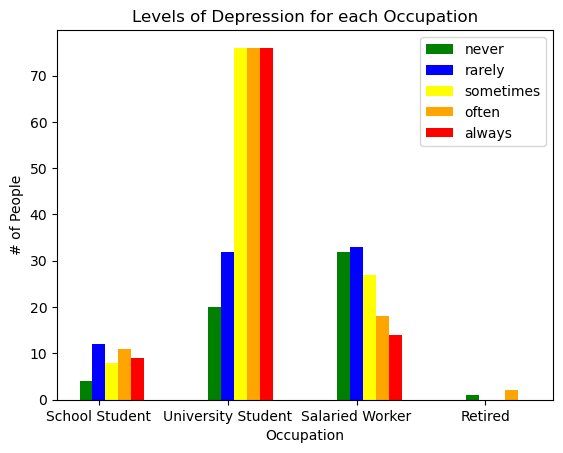

In [55]:
#setting the number of occupations and the width of the bars represented in each occupation
N = 4
ind = np.arange(N)  
width = 0.1

#Create a multiple bar chart for each occupation and the levels of depression
depression_level_1 = [4, 20, 32, 1]
bar1 = plt.bar(ind, depression_level_1, width, color = 'green') 

depression_level_2 = [12, 32, 33, 0]
bar2 = plt.bar(ind+width, depression_level_2, width, color='blue') 

depression_level_3 = [8, 76, 27, 0]
bar3 = plt.bar(ind+width*2, depression_level_3, width, color = 'yellow') 

depression_level_4 = [11, 76, 18, 2]
bar4 = plt.bar(ind+width*3, depression_level_4, width, color = 'orange') 

depression_level_5 = [9, 76, 14, 0]
bar5 = plt.bar(ind+width*4, depression_level_5, width, color = 'red') 

#Labeling the x-axis, how far apart the bars display, and creating the legend
x_Labels=["School Student", "University Student", "Salaried Worker", "Retired"]
plt.xticks(ind+width, x_Labels)
plt.legend((bar1, bar2, bar3, bar4, bar5), ('never','rarely', 'sometimes', 'often', 'always'))

#Labeling the x-axis, y-axis, and title
plt.title("Levels of Depression for each Occupation")
plt.xlabel("Occupation")
plt.ylabel("# of People")

plt.show()

In [77]:
#Convert Column "Average time on social media (per Day)" from string values to integer values
sm_time_converted = data_file_df.replace(["Less than an Hour", "Between 1 and 2 hours", "Between 2 and 3 hours", "Between 3 and 4 hours", "Between 4 and 5 hours", "More than 5 hours"], [0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
sm_time_converted.head(5)

,Age,Gender,Occupation,Use Social Media (Y/N),Soical Media Platforms Used,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",3.5,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",5.5,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",2.5,3,5,4,4,5,5,3,3,3,4,4,1


In [96]:
#Create a table of averages for each occupation and focus on certain columns
occupations_mean_data = sm_time_converted.groupby(["Occupation"]).mean(numeric_only=True).round(1)
occupations_mean_data_trim = occupations_mean_data[["Age", 
                                                    "Average time on social media (per Day)",
                                                    "How often do you feel depressed or down?", 
                                                    "On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?", 
                                                    "On a scale of 1 to 5, how often do you face issues regarding sleep?"]]
#Reindex the occupations based on chronological order
occupations_mean_data_trim.reindex(["School Student", "University Student", "Salaried Worker", "Retired"])

,Age,Average time on social media (per Day),How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
Occupation,,,,,
School Student,18.0,3.7,3.2,3.2,3.3
University Student,22.3,3.8,3.6,3.4,3.4
Salaried Worker,36.4,2.6,2.6,2.7,2.7
Retired,50.3,3.2,3.0,3.0,3.7


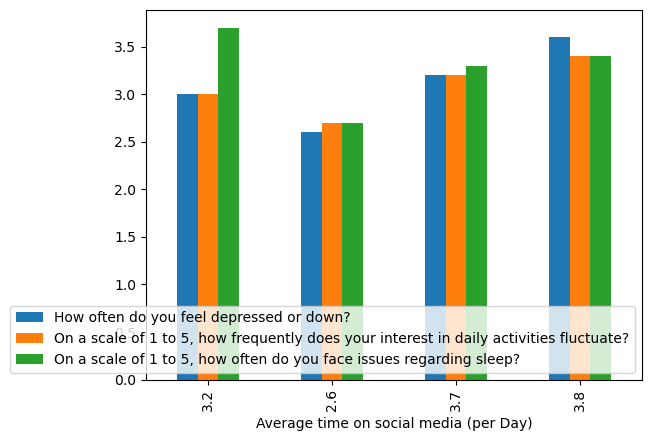

In [101]:
# plot the dataframe
occupations_mean_data_trim.plot(x="Average time on social media (per Day)", 
                                y=["How often do you feel depressed or down?", 
                                   "On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
                                  "On a scale of 1 to 5, how often do you face issues regarding sleep?"], kind="bar")
 
# print bar graph
plt.legend(loc='lower right')
plt.show()

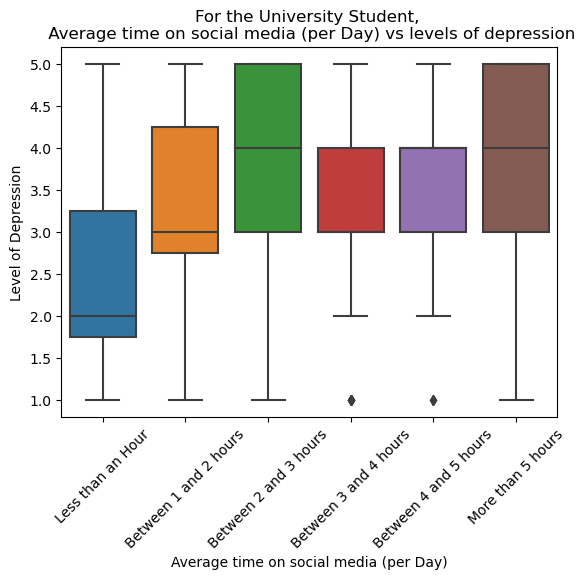

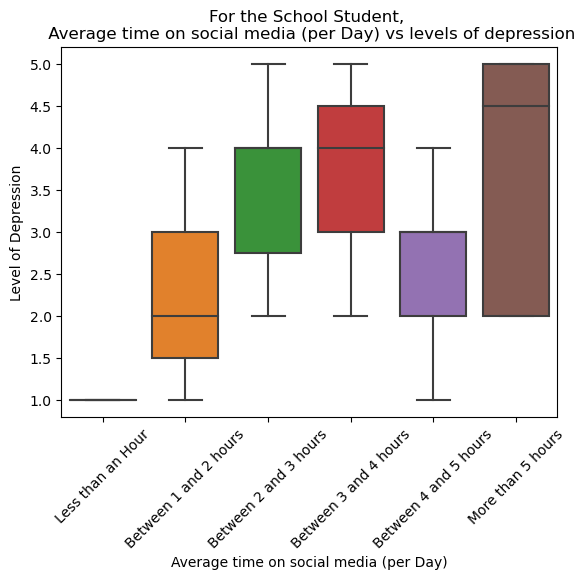

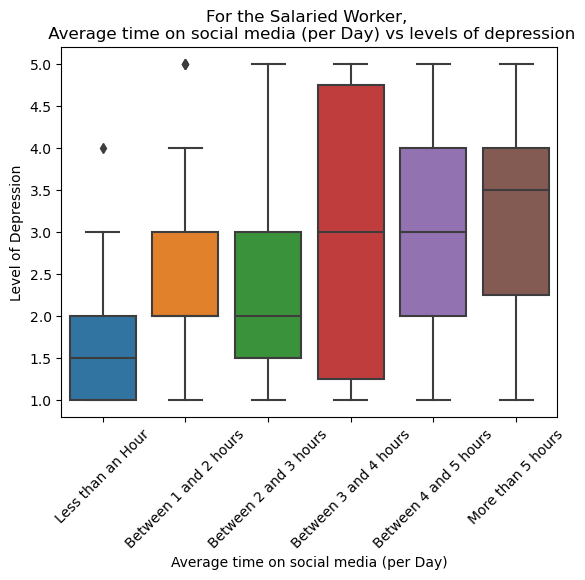

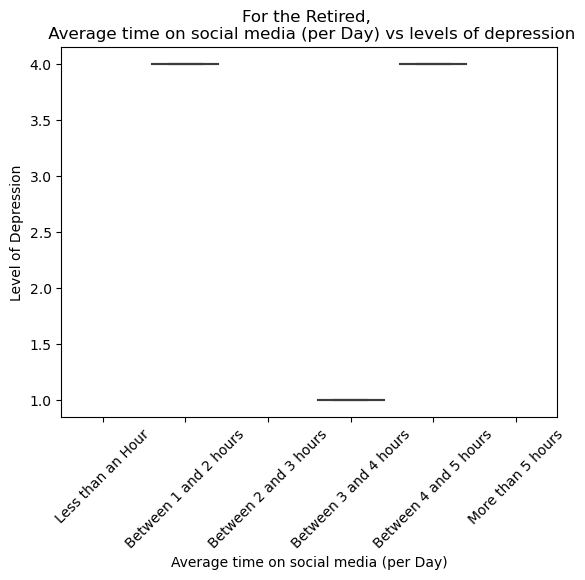

In [80]:
#Creatd box plots for each occupation to represent the Average time on Social Media and the Levels of Depression
labels = ["University Student", "School Student", "Salaried Worker", "Retired"]
occupations = [universityStudent, schoolStudent, worker, retired]

for x, label in zip(occupations, labels):
    sns.boxplot(x = "Average time on social media (per Day)", y = "How often do you feel depressed or down?", data=x, order=["Less than an Hour", "Between 1 and 2 hours", "Between 2 and 3 hours", "Between 3 and 4 hours", "Between 4 and 5 hours", "More than 5 hours"])

    plt.title(f"For the {label}, \n Average time on social media (per Day) vs levels of depression")
    plt.xlabel("Average time on social media (per Day)")
    plt.ylabel("Level of Depression")
    plt.xticks(rotation=45)
    plt.show()

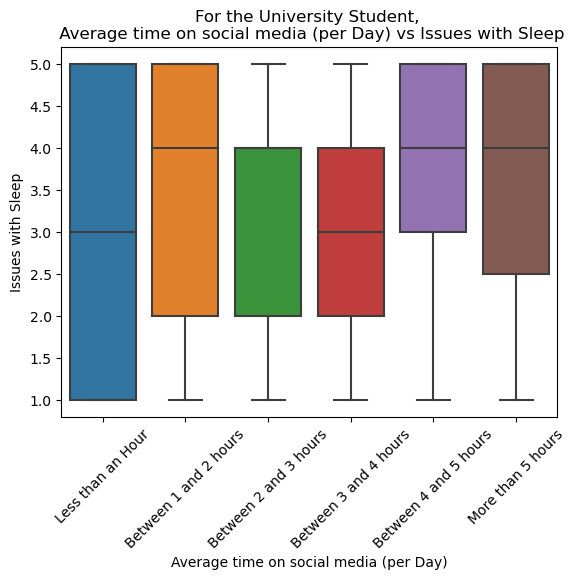

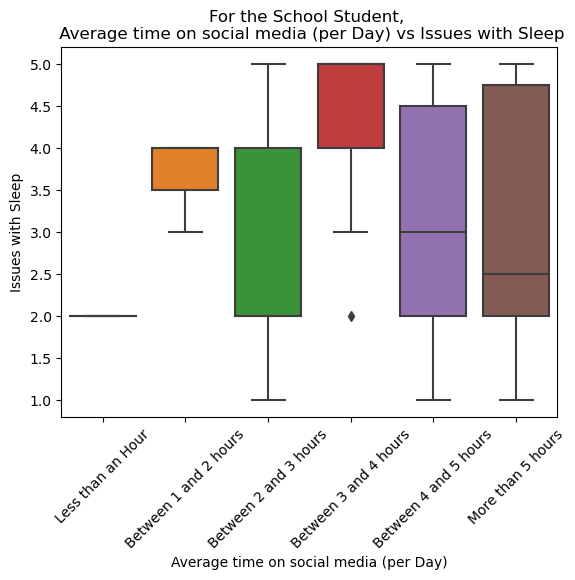

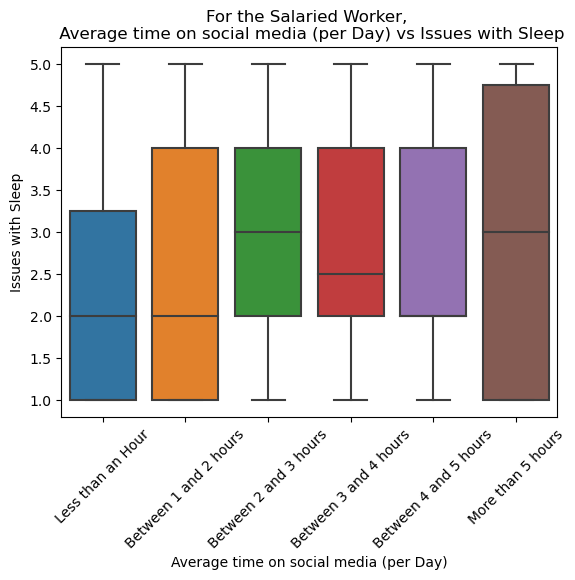

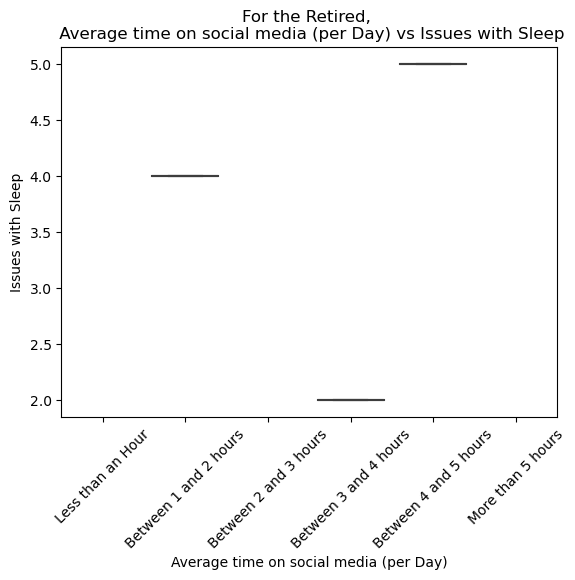

In [52]:
#Created box plots for each occupation to represent the Average time on Social Media and the Issues regarding Sleep
labels = ["University Student", "School Student", "Salaried Worker", "Retired"]
occupations = [universityStudent, schoolStudent, worker, retired]

for x, label in zip(occupations, labels):
    sns.boxplot(x = "Average time on social media (per Day)", y = "On a scale of 1 to 5, how often do you face issues regarding sleep?", data=x, order=["Less than an Hour", "Between 1 and 2 hours", "Between 2 and 3 hours", "Between 3 and 4 hours", "Between 4 and 5 hours", "More than 5 hours"])

    plt.title(f"For the {label}, \n Average time on social media (per Day) vs Issues with Sleep")
    plt.xlabel("Average time on social media (per Day)")
    plt.ylabel("Issues with Sleep")
    plt.xticks(rotation=45)
    plt.show()

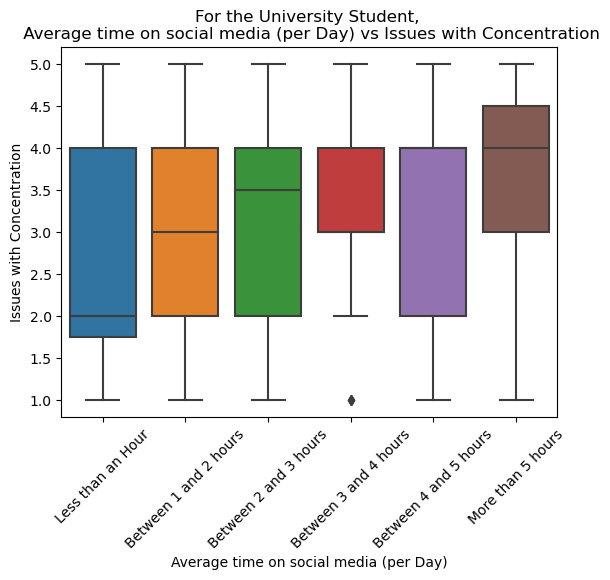

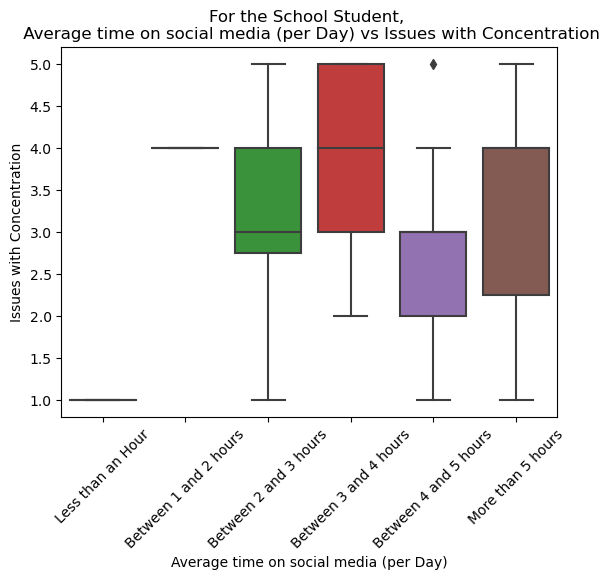

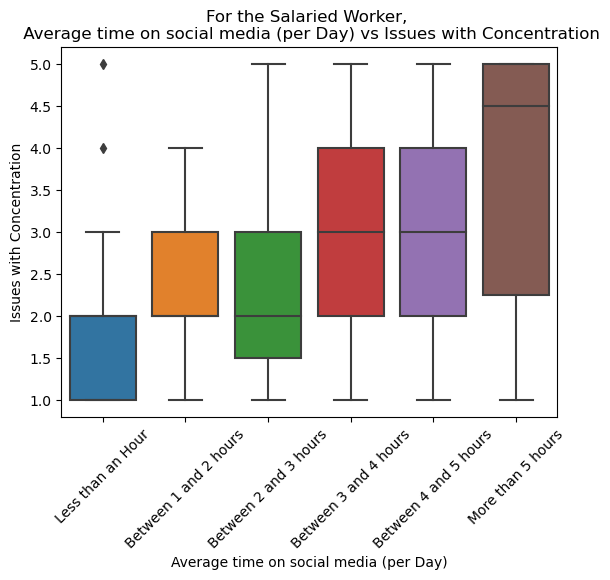

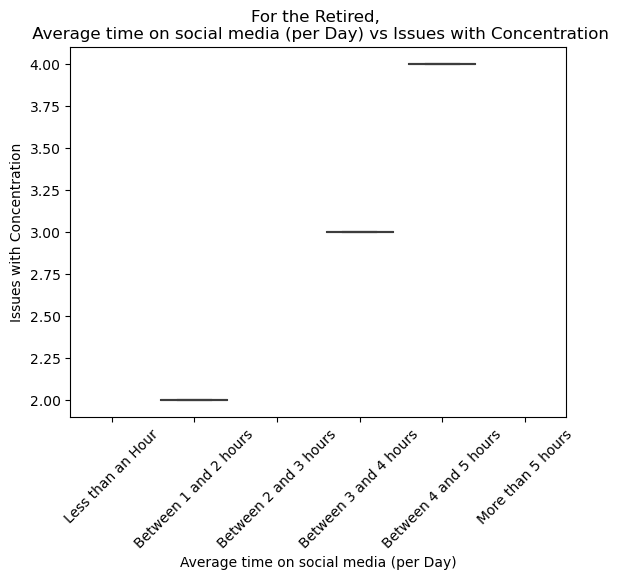

In [53]:
#Created box plots for each occupation to represent the Average time on Social Media and the Issues regarding Sleep
labels = ["University Student", "School Student", "Salaried Worker", "Retired"]
occupations = [universityStudent, schoolStudent, worker, retired]

for x, label in zip(occupations, labels):
    sns.boxplot(x = "Average time on social media (per Day)", y = "On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?", data=x, order=["Less than an Hour", "Between 1 and 2 hours", "Between 2 and 3 hours", "Between 3 and 4 hours", "Between 4 and 5 hours", "More than 5 hours"])

    plt.title(f"For the {label}, \n Average time on social media (per Day) vs Issues with Concentration")
    plt.xlabel("Average time on social media (per Day)")
    plt.ylabel("Issues with Concentration")
    plt.xticks(rotation=45)
    plt.show()